Code: make profile determine by the following curves in 2D

The values in the 2D plane should be in x ∈ [-3.141592653589793, 3.141592653589793] and y ∈ [-1.0, 1.0]


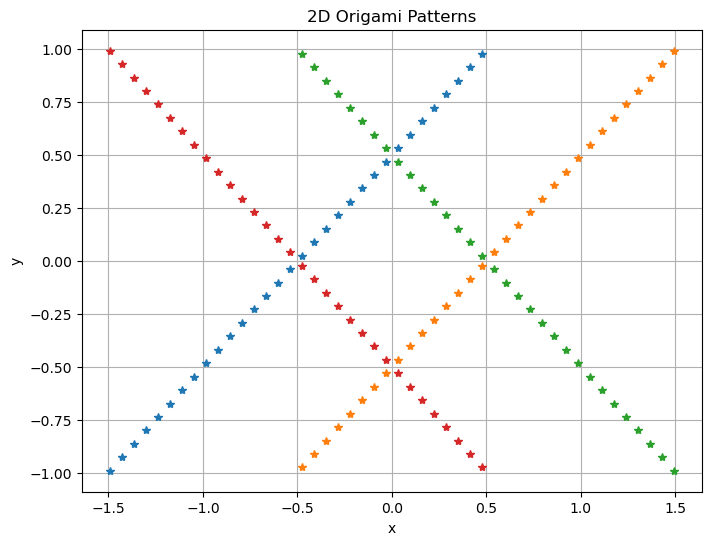

In [140]:
# Re-import necessary libraries after code execution state reset
import numpy as np
import matplotlib.pyplot as plt

# Cylinder dimensions
cylinder_height = 2
cylinder_radius = 1

# Flattened cylinder dimensions
fc_x = cylinder_radius * 2 * np.pi
fc_y = cylinder_height

fc_x_min = -fc_x / 2
fc_x_max = fc_x / 2
fc_y_min = -fc_y / 2
fc_y_max = fc_y / 2

print(f"The values in the 2D plane should be in x ∈ [{fc_x_min}, {fc_x_max}] and y ∈ [{fc_y_min}, {fc_y_max}]")

# Curve generation parameters
a = 1
num_points = 100
point_list = []

b1 = 0.5 
b2 = -0.5

# x = np.linspace(fc_x_min, fc_x_max, num_points)
# y = a * x
# mask = (x >= fc_x_min) & (x <= fc_x_max) & (y >= fc_y_min) & (y <= fc_y_max)
# point_list.append((x[mask], y[mask]))

x = np.linspace(fc_x_min, fc_x_max, num_points)
y = a * x + b1
mask = (x >= fc_x_min) & (x <= fc_x_max) & (y >= fc_y_min) & (y <= fc_y_max)
point_list.append((x[mask], y[mask]))

x = np.linspace(fc_x_min, fc_x_max, num_points)
y = a * x + b2
mask = (x >= fc_x_min) & (x <= fc_x_max) & (y >= fc_y_min) & (y <= fc_y_max)
point_list.append((x[mask], y[mask]))

# x = np.linspace(fc_x_min, fc_x_max, num_points)
# y = -a * x
# mask = (x >= fc_x_min) & (x <= fc_x_max) & (y >= fc_y_min) & (y <= fc_y_max)
# point_list.append((x[mask], y[mask]))

x = np.linspace(fc_x_min, fc_x_max, num_points)
y = -a * x + b1
mask = (x >= fc_x_min) & (x <= fc_x_max) & (y >= fc_y_min) & (y <= fc_y_max)
point_list.append((x[mask], y[mask]))

x = np.linspace(fc_x_min, fc_x_max, num_points)
y = -a * x + b2
mask = (x >= fc_x_min) & (x <= fc_x_max) & (y >= fc_y_min) & (y <= fc_y_max)
point_list.append((x[mask], y[mask]))

# Plot the curves
plt.figure(figsize=(8, 6))
for x_vals, y_vals in point_list:
    plt.plot(x_vals, y_vals, "*")
plt.grid(True)
plt.title('2D Origami Patterns')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



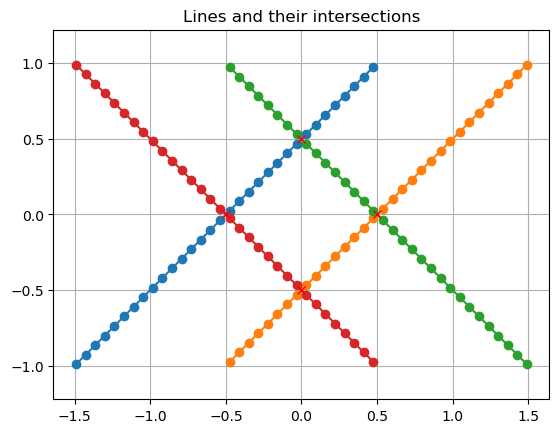

In [141]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Step 1: Fit lines (y = mx + b)
lines = []
for group in point_list:
    x = group[0]
    y = group[1]
    m, b = np.polyfit(x, y, 1)  # Linear fit
    lines.append((m, b))


# Step 2: Compute intersections
def intersection(line1, line2):
    m1, b1 = line1
    m2, b2 = line2
    if np.isclose(m1, m2):  # Parallel lines
        return None
    x = (b2 - b1) / (m1 - m2)
    y = m1 * x + b1
    return np.array([x, y])

intersections = []
for lineA, lineB in itertools.combinations(lines, 2):
    pt = intersection(lineA, lineB)
    if pt is not None:
        intersections.append(pt)

# Optional: Visualize
for group in point_list:
    plt.plot(group[0], group[1], marker='o')

for pt in intersections:
    plt.plot(pt[0], pt[1], 'rx')  # intersection point

plt.axis('equal')
plt.title('Lines and their intersections')
plt.grid(True)
plt.show()

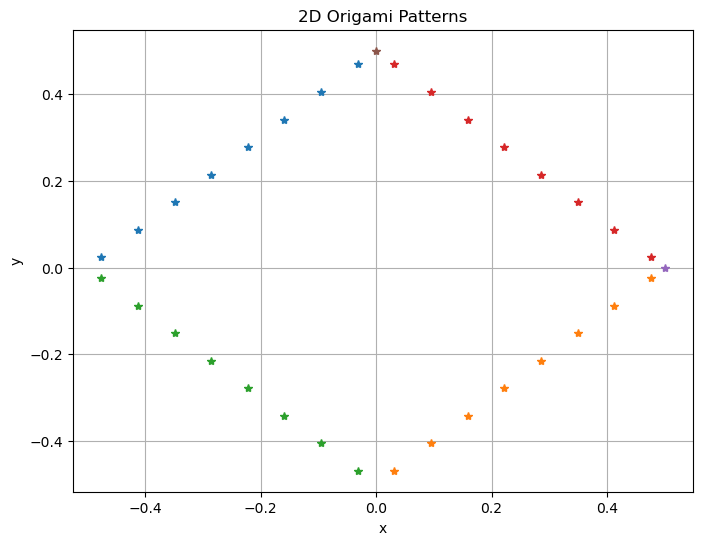

In [142]:
import numpy as np

def select_points_between(line_points, p_start, p_end, inclusive=True):
    x = line_points[0]
    y = line_points[1]
    max_x = max(p_start[0], p_end[0])
    min_x = min(p_start[0], p_end[0])
    max_y = max(p_start[1], p_end[1])
    min_y = min(p_start[1], p_end[1])
    mask = ( x >= min_x ) & ( x <= max_x ) & ( y >= min_y ) & ( y <= max_y )
    truncated_line = []
    truncated_line.append( ( x[mask] , y[mask] ) )
    return truncated_line 


new_line1 = select_points_between(point_list[0], intersections[1], intersections[0] ) ;
new_line2 = select_points_between(point_list[1], intersections[3], intersections[2] ) ;
new_line3 = select_points_between(point_list[3], intersections[3], intersections[1] ) ;
new_line4 = select_points_between(point_list[2], intersections[0], intersections[2] ) ;

plt.figure(figsize=(8, 6))
plt.plot(new_line1[0][0] , new_line1[0][1] , "*")
plt.plot(new_line2[0][0] , new_line2[0][1] , "*")
plt.plot(new_line3[0][0] , new_line3[0][1] , "*")
plt.plot(new_line4[0][0] , new_line4[0][1] , "*")

# plt.plot( point_list[3][0], point_list[3][1] , "*" )

plt.plot(intersections[2][0] , intersections[2][1], "*")
plt.plot(intersections[0][0] , intersections[0][1], "*")
plt.grid(True)
plt.title('2D Origami Patterns')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


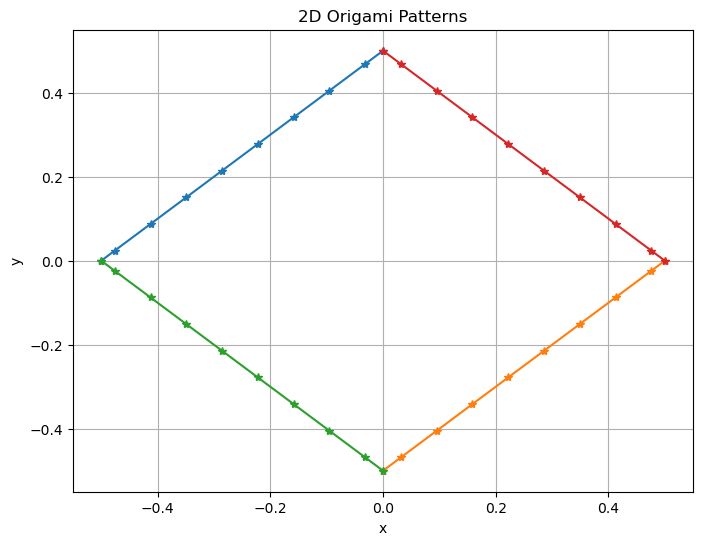

In [143]:

# NEW line 1
start_point = intersections[1]
end_point = intersections[0]
x_array, y_array = new_line1[0]
x_new = np.concatenate(([start_point[0]], x_array, [end_point[0]]))
y_new = np.concatenate(([start_point[1]], y_array, [end_point[1]]))
new_line1_appended = (x_new, y_new)

# NEW line 2
start_point = intersections[3]
end_point = intersections[2]
x_array, y_array = new_line2[0]
x_new = np.concatenate(([start_point[0]], x_array, [end_point[0]]))
y_new = np.concatenate(([start_point[1]], y_array, [end_point[1]]))
new_line2_appended = (x_new, y_new)

# NEW line 3
start_point = intersections[1]
end_point = intersections[3]
x_array, y_array = new_line3[0]
x_new = np.concatenate(([start_point[0]], x_array, [end_point[0]]))
y_new = np.concatenate(([start_point[1]], y_array, [end_point[1]]))
new_line3_appended = (x_new, y_new)

# NEW line 4
start_point = intersections[0]
end_point = intersections[2]
x_array, y_array = new_line4[0]
x_new = np.concatenate(([start_point[0]], x_array, [end_point[0]]))
y_new = np.concatenate(([start_point[1]], y_array, [end_point[1]]))
new_line4_appended = (x_new, y_new)


plt.figure(figsize=(8, 6))
plt.plot(new_line1_appended[0] , new_line1_appended[1] , "-*")
plt.plot(new_line2_appended[0] , new_line2_appended[1] , "-*")
plt.plot(new_line3_appended[0] , new_line3_appended[1] , "-*")
plt.plot(new_line4_appended[0] , new_line4_appended[1] , "-*")


plt.grid(True)
plt.title('2D Origami Patterns')
plt.xlabel('x')
plt.ylabel('y')
plt.show()




In [144]:
# Clean and convert to a 2D array of points
line1 = np.column_stack(new_line1_appended)
line2 = np.column_stack(new_line2_appended)
line3 = np.column_stack(new_line3_appended)
line4 = np.column_stack(new_line4_appended)
lines = [line1, line2, line3, line4]

In [162]:
print( len(lines_cylinder) )
print( len( lines_cylinder[3]))
print( lines_cylinder[3][8][2])

4
10
0.02400111309245556


In [148]:
for line in lines_cylinder:
    for x , y , z in line: 
        print(x)

1.9378248434212895
1.9436231366470833
1.9576048924295575
1.969615506024416
1.9796428837618656
1.9876769289225082
1.9937095519038848
1.997734678366016
1.9997482553477501
2.0
2.0
1.9997482553477501
1.997734678366016
1.9937095519038848
1.9876769289225082
1.9796428837618654
1.969615506024416
1.9576048924295575
1.9436231366470833
1.9378248434212895
1.9378248434212895
1.9436231366470833
1.9576048924295575
1.969615506024416
1.9796428837618656
1.9876769289225082
1.9937095519038848
1.997734678366016
1.9997482553477501
2.0
2.0
1.9997482553477501
1.997734678366016
1.9937095519038848
1.9876769289225082
1.9796428837618654
1.969615506024416
1.9576048924295575
1.9436231366470833
1.9378248434212895


In [169]:
lines[0][0]

array([-0.5,  0. ])

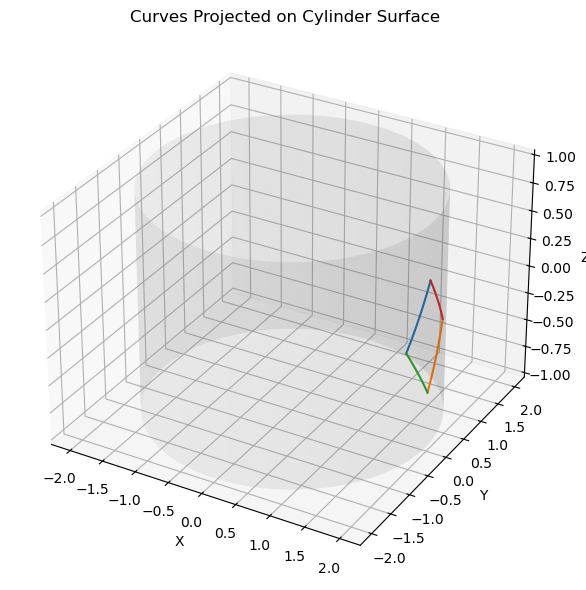

array([0.5       , 0.46826674, 0.40480022, 0.3413337 , 0.27786719,
       0.21440067, 0.15093415, 0.08746763, 0.02400111, 0.        ])

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

lines_cylinder = []
cylinder_radius = 2.0

for line in lines:
    line_projected = []
    for x,y in line:
        theta = x / cylinder_radius 
        X = cylinder_radius * np.cos( theta )
        Y = cylinder_radius * np.sin( theta )
        Z = y 
        line_projected.append((X,Y,Z))
    line_projected_stack = np.column_stack(line_projected)
    lines_cylinder.append(line_projected)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for line in lines_cylinder:
    line = np.array(line)
    x, y, z = line[:, 0], line[:, 1], line[:, 2]
    ax.plot3D(x, y, z)

# Draw the cylinder
theta_cyl = np.linspace(0, 2 * np.pi, 100)
z_cyl = np.linspace(-1, 1, 100)
theta_cyl, z_cyl = np.meshgrid(theta_cyl, z_cyl)
x_cyl = cylinder_radius * np.cos(theta_cyl)
y_cyl = cylinder_radius * np.sin(theta_cyl)

ax.plot_surface(x_cyl, y_cyl, z_cyl, alpha=0.1, color='gray')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Curves Projected on Cylinder Surface')
plt.tight_layout()
plt.show()

z

In [182]:
len(lines_cylinder[0])

10

In [190]:
# Step 5: Read the Fusion 360 script
with open('carreaux.py', 'r') as file:
    lines = file.readlines()

# Step 6: Locate code generation section
start_idx = None
end_idx = None

for i, line in enumerate(lines):
    if '# START CODE GENERATION SECTION DO NOT REMOVE COMMENTS' in line:
        start_idx = i
    if '# END CODE GENERATION SECTION DO NOT REMOVE COMMENTS' in line:
        end_idx = i

if start_idx is None or end_idx is None or start_idx >= end_idx:
    raise ValueError("Code generation section not found or improperly formatted.")

marker_to_var = {}  
generated_code = []
generated_code.append('\n')
for i in range(len(lines_cylinder)):
    generated_code.append(f'        sketch{i} = sketches.add(rootComp.xYConstructionPlane)\n')
    generated_code.append(f'        sketch{i}.is3D = True\n')
    generated_code.append(f'        pts{i} = adsk.core.ObjectCollection.create()\n')
    for j in range(len(lines_cylinder[i])):
        var_name = f'p{i}_{j}'
        generated_code.append(f'        pts{i}.add(adsk.core.Point3D.create({lines_cylinder[i][j][0]}, {lines_cylinder[i][j][1]}, {lines_cylinder[i][j][2]}))\n')
    generated_code.append(f'        spline{i} = sketch{i}.sketchCurves.sketchFittedSplines.add(pts{i})\n')
    generated_code.append('\n\n')
   
        
generated_code.append('\n\n')

generated_code.append(f'        pathCurves{i} = adsk.core.ObjectCollection.create()\n')
generated_code.append(f'        pathCurves{i}.add(spline{0})\n')
generated_code.append(f'        pathCurves{i}.add(spline{2})\n')
generated_code.append(f'        pathCurves{i}.add(spline{1})\n')
generated_code.append(f'        pathCurves{i}.add(spline{3})\n')
generated_code.append('\n\n')

generated_code.append(f'        patches = rootComp.features.patchFeatures\n')
generated_code.append(f'        patchInput = patches.createInput(pathCurves{i}, adsk.fusion.FeatureOperations.NewBodyFeatureOperation)\n')
generated_code.append(f'        patch{i} = patches.add(patchInput)\n')


generated_code.append('\n')


new_lines = lines[:start_idx + 1] + generated_code + lines[end_idx:]

with open('carreaux.py', 'w') as file:
    file.writelines(new_lines)

# CODE that is more versatile and can work with non straight curves 

In [ ]:
# Re-import necessary libraries after code execution state reset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

point_list_cylinder = [] # this list stores the projected 2D points on the cylinder 

for x_vals, y_vals in lines:
    theta = x_vals / cylinder_radius  # map x to angle
    X = cylinder_radius * np.cos(theta)
    Y = cylinder_radius * np.sin(theta)
    Z = y_vals  # y becomes height on the cylinder

    point_list_cylinder.append((X, Y, Z))

# Plot the projected curves on the cylinder
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Draw each curve
for X, Y, Z in point_list_cylinder:
    ax.plot3D(X, Y, Z)

# Optional: draw a transparent cylinder for context
theta_cyl = np.linspace(0, 2*np.pi, 100)
z_cyl = np.linspace(-1, 1, 100)
theta_cyl, z_cyl = np.meshgrid(theta_cyl, z_cyl)
x_cyl = cylinder_radius * np.cos(theta_cyl)
y_cyl = cylinder_radius * np.sin(theta_cyl)

ax.plot_surface(x_cyl, y_cyl, z_cyl, alpha=0.1, color='gray')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Curves Projected on Cylinder Surface')
plt.tight_layout()
plt.show()


In [81]:
import numpy as np
from scipy.spatial import cKDTree

def find_close_point_pairs(point_list, threshold=0.1):
    point_groups = [np.column_stack((x, y)) for (x, y) in point_list]
    close_pairs = []

    for i, group_a in enumerate(point_groups):
        tree_a = cKDTree(group_a)

        for j, group_b in enumerate(point_groups):
            if j <= i:
                continue

            tree_b = cKDTree(group_b)
            matches = tree_a.query_ball_tree(tree_b, r=threshold)

            for idx_a, list_b in enumerate(matches):
                for idx_b in list_b:
                    pt_a = group_a[idx_a]
                    pt_b = group_b[idx_b]
                    distance = np.linalg.norm(pt_a - pt_b)
                    close_pairs.append(((i, idx_a, pt_a), (j, idx_b, pt_b), distance))

    return close_pairs

# Call the function
neighbors = find_close_point_pairs(point_list, threshold=0.1)
print(f'Found {len(neighbors)} close pairs.')

Found 16 close pairs.


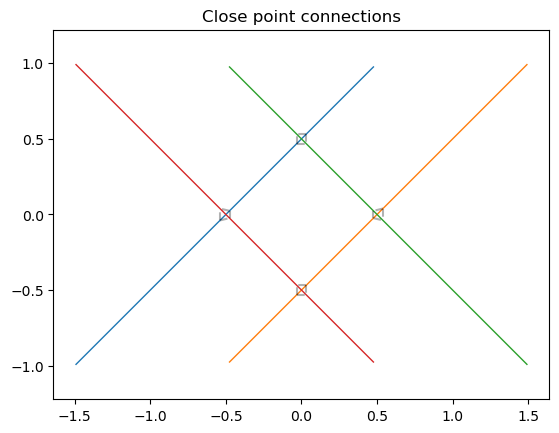

In [82]:
import matplotlib.pyplot as plt

# Plot all groups
for x, y in point_list:
    plt.plot(x, y, lw=1)

# Plot connections between close points
for (_, _, pt1), (_, _, pt2), _ in neighbors:
    xs, ys = zip(pt1, pt2)
    plt.plot(xs, ys, 'k--', alpha=0.3)

plt.axis('equal')
plt.title("Close point connections")
plt.show()

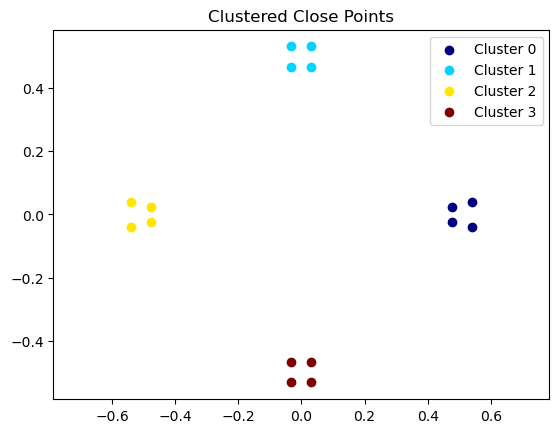

In [85]:
from sklearn.cluster import DBSCAN
import numpy as np

def cluster_close_pairs(neighbors, eps=0.05, min_samples=1):
    # Flatten all points from the close pairs
    points = []
    for (i1, idx1, pt1), (i2, idx2, pt2), dist in neighbors:
        points.append(tuple(pt1))
        points.append(tuple(pt2))

    # Remove duplicates
    unique_points = np.array(list(set(points)))

    # Apply DBSCAN clustering
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(unique_points)

    # Group points by cluster label
    clusters = {}
    for label, pt in zip(clustering.labels_, unique_points):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(pt)

    return clusters

clusters = cluster_close_pairs(neighbors, eps = 0.1)

import matplotlib.pyplot as plt

colors = plt.cm.jet(np.linspace(0, 1, len(clusters)))

for i, (label, pts) in enumerate(clusters.items()):
    pts = np.array(pts)
    plt.scatter(pts[:, 0], pts[:, 1], color=colors[i], label=f"Cluster {label}")

plt.legend()
plt.axis('equal')
plt.title("Clustered Close Points")
plt.show()

In [86]:
mean_per_cluster = []
intersections = []

for idx in range(len(clusters)):
    cluster_points = np.array(clusters[idx])
    x_mean = cluster_points[:, 0].mean()
    y_mean = cluster_points[:, 1].mean()
    mean_per_cluster.append((idx, x_mean, y_mean))
    intersections.append((x_mean,y_mean))


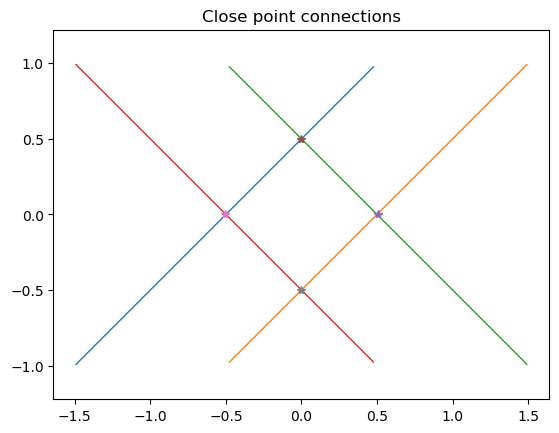

In [87]:
import matplotlib.pyplot as plt

# Plot all groups
for x, y in point_list:
    plt.plot(x, y, lw=1)

for x , y in intersections:
    plt.plot(x, y, '*')

plt.axis('equal')
plt.title("Close point connections")
plt.show()

Consider that the 2D plane on which the points are drawn are on a plane that is tangeant to a cylindrical surface of radius r = 0.6 with a length between z = -1 and 1 